# Week13: CNN and RNN

- **Student ID** : 2022113170
- **Name** : 장정의

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week13_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week13\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Convolutional Neural Netowks

### Image Classification with CNNs

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

### Load and Preprocess the Fashion-MNIST Dataset 

In [57]:
# load the fashioin_mnist dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [58]:
# scaling X
X_train, X_test = X_train / 255.0, X_test / 255.0
num_classes = 10

In [59]:
# Expand dimension (Channel dim), and check shape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) 
X_train.shape

(60000, 28, 28, 1)

In [60]:
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_test.shape

(10000, 28, 28, 1)

In [61]:
y_train = y_train.reshape(y_train.shape[0], 1) 
y_train.shape

(60000, 1)

In [62]:
y_test = y_test.reshape(y_test.shape[0], 1) 
y_test.shape

(10000, 1)

In [63]:
# show y_train
y_train

array([[9],
       [0],
       [0],
       ...,
       [3],
       [0],
       [5]], dtype=uint8)

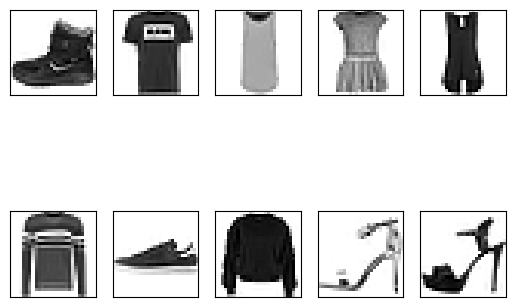

In [64]:
# show first 10 images

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

### Build the CNN model
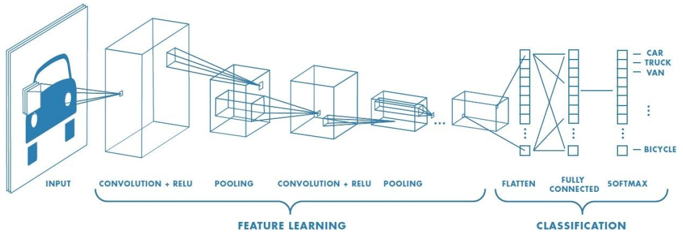

In [65]:
# Input layer
#    1. shape=(28, 28, 1)
# CNN model with 2 convolution layers 
#    2. 32 3x3 filters, padding="same", input_shape = (28, 28, 1), activation="relu"
#    3. 64 3x3 filters, activation="relu"
# and max pooling layer with size=2
# and 2 dense layers (128, 10)
#    4. 128, activation="relu"
#    5. 10, activation="softmax"
base_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3,3),
                 padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=(3,3),
                 activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(), 
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


base_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,404,682 (5.36 MB)

 Trainable params: 1,404,682 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

### Compile the model

In [66]:
# compile the model with loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']
base_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### Train the model

In [67]:
# train the CNN model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
base_history = base_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8308 - loss: 0.4719 - val_accuracy: 0.8981 - val_loss: 0.2728


### Plot the loss

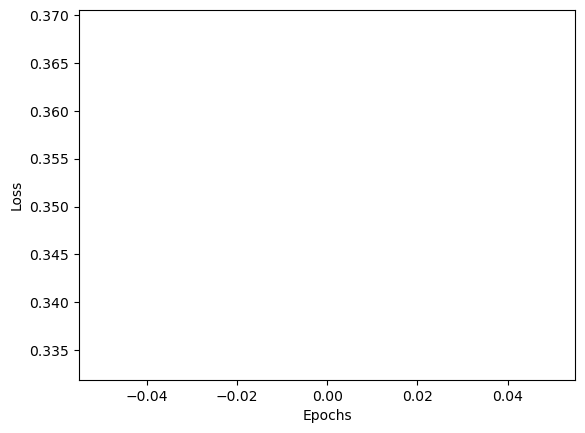

In [68]:
# plot the loss. use history.history['loss']
plt.plot(base_history.epoch, base_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the base model

In [69]:
# Train and test accuracy. use evaluate()

loss, acc = base_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = base_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9183 - loss: 0.2259
Train accuracy : 0.9163
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9014 - loss: 0.2737
Test accuracy : 0.8981


### The model with dropout regularization
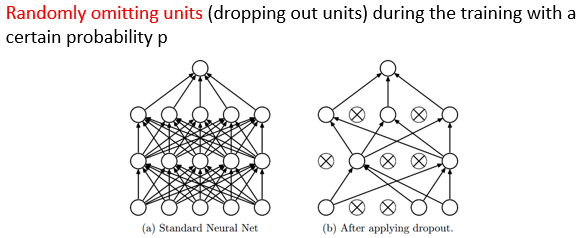

In [70]:
# Base CNN model + dropout with 0.5 before the last layer
dropout_model = tf.keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3),
                 padding='same', activation='relu'),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])


base_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,214,048 (16.08 MB)

 Trainable params: 1,404,682 (5.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,809,366 (10.72 MB)

### Compile the dropout model

In [71]:
# compile the model
dropout_model.compile(loss='sparse_categorical_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

### Train the dropout model

In [72]:
# train the dropout model with X_train, y_train, 10 epochs, validation_data=(X_test, y_test)
drop_history = dropout_model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7860 - loss: 0.6091 - val_accuracy: 0.8922 - val_loss: 0.2926


### Plot the loss

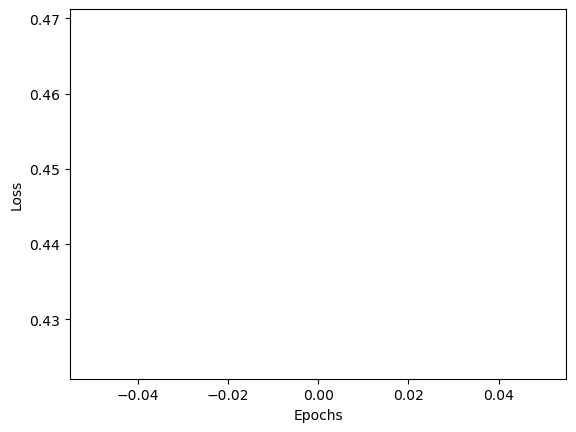

In [73]:
# plot the loss. use history.history['loss']
plt.plot(drop_history.epoch, drop_history.history['loss'])

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Evaluate the dropout model

In [74]:
# Train and test accuracy. use evaluate()
loss, acc = dropout_model.evaluate(X_train, y_train)
print('Train accuracy : %.4f' % acc)
loss, acc = dropout_model.evaluate(X_test, y_test)
print('Test accuracy : %.4f' % acc)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9073 - loss: 0.2510
Train accuracy : 0.9060
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8934 - loss: 0.2913
Test accuracy : 0.8922


### Plotting the learning curves

C:\Users\jangj\AppData\Local\Temp\ipykernel_20736\2461146589.py:8: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim([0,max(base_history.epoch)])


(-0.05, 0.05)

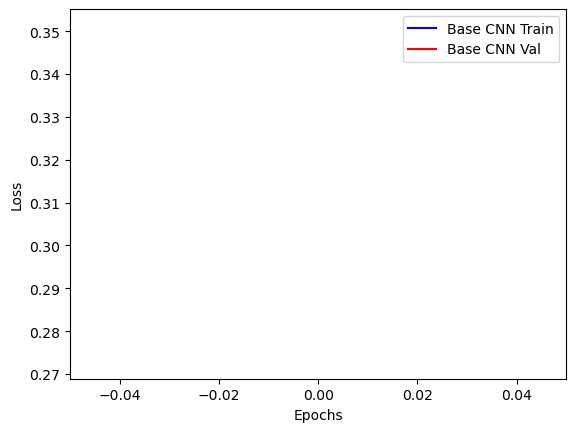

In [75]:
# plot the train/validation losses for each model
plt.plot(base_history.epoch, base_history.history['loss'], color='blue', label='Base CNN Train')
plt.plot(base_history.epoch, base_history.history['val_loss'], color='red', label='Base CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(base_history.epoch)])

(0.0, 9.0)

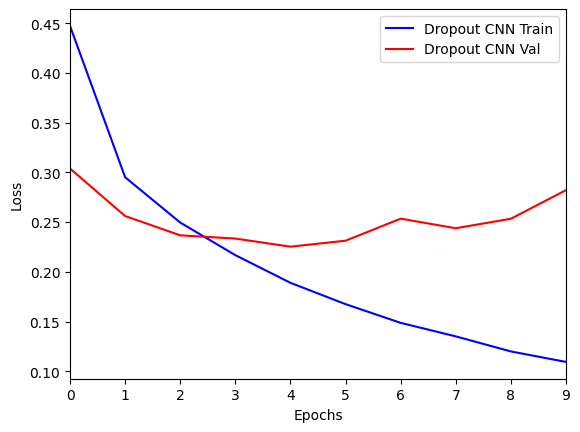

In [62]:
# plot the train/validation losses for each modelr
plt.plot(drop_history.epoch, drop_history['loss'], color='blue', label='Dropout CNN Train')
plt.plot(drop_history.epoch, drop_history['loss'], color='red', label='Dropout CNN Val')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(drop_history.epoch)])

---

# 2. Recurrent Neural Networks

### Character-level Language Model with RNNs

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

### Load a text to use for training - "The Mysterious Island"

In [103]:
# Reading and processing text '1268-0.txt'
with open('1268-0.txt', 'r') as fp:
    text=fp.read()
    
# use main contents only 
start_indx = text.find('Chapter 1')
end_indx = text.find('End of the Project Gutenberg')
text = text[start_indx:end_indx]

print('Total length:', len(text))

Total length: 1120345


In [104]:
# Check first 500 characters
print(text[:500])

Chapter 1

  Are we rising again?     No. On the contrary.     Are we descending?  
   Worse than that, captain! we are falling!     For Heaven  s sake heave out
the ballast!     There! the last sack is empty!     Does the balloon rise?  
   No!     I hear a noise like the dashing of waves. The sea is below the
car! It cannot be more than 500 feet from us!     Overboard with every
weight! ... everything!  

Such were the loud and startling words which resounded through the air,
above the vast wa


In [105]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '&', '(', ')', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '=', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 75


### Encode the text into integers

In [106]:
# Creating a mapping from characters to indices, and vice versa
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

print(char2idx['A'])
print(idx2char[24])

24
A


In [107]:
# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

# Show encoded text[11:25]
print('Original text :', text[11:25])
print('Encoded text :', encoded_text[11:25])

Original text :   Are we risin
Encoded text : [ 1  1 24 66 53  1 71 53  1 66 57 67 57 62]


### Create TensorFlow Dataset
- from_tensor_slices() : Creates a Dataset whose elements are slices of the given tensors.
- .as_numpy_iterator() : Returns an iterator which converts all elements of the dataset to numpy.
- .take(*count*) : Creates a `Dataset` with at most *count* elements from this dataset.

In [108]:
# example of TensorFlow dataset
ds = tf.data.Dataset.from_tensor_slices([10, 20, 30])
ds

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [109]:
# example of TensorFlow dataset
for item in ds:
    print(item)

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(20, shape=(), dtype=int32)
tf.Tensor(30, shape=(), dtype=int32)


In [110]:
# example of dataset to numpy iterator
for element in ds.as_numpy_iterator():
    print(element)

np.array(list(ds.as_numpy_iterator())).shape

10
20
30


(3,)

In [111]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

# check first 3 elements
for item in ds.take(3):
    print(item.numpy())

26
56
49


### Make character sequences from the dataset
- .batch(*count*) : Combines consecutive elements of dataset into batches.
- **sequences** : sequence of fixed size inputs. `tf.data.Dataset` object, shape = (*, 41)


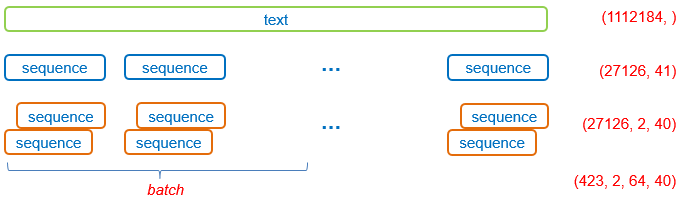

In [112]:
# example of making sequences
seq_length = 3
ds = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7])
ds_sequences = ds.batch(seq_length, drop_remainder=True)

for item in ds_sequences:
    print(item.numpy())

[1 2 3]
[4 5 6]


In [113]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

In [114]:
# check first 2 elements
for item in ds_sequences.take(2):
    print(item.numpy())
    
for item in ds_sequences.take(2):
    print(repr(''.join(idx2char[item.numpy()])))

[26 56 49 64 68 53 66  1 11  0  0  1  1 24 66 53  1 71 53  1 66 57 67 57
 62 55  1 49 55 49 57 62 23  1  1  1  1  1 37 63  8]
[ 1 38 62  1 68 56 53  1 51 63 62 68 66 49 66 73  8  1  1  1  1  1 24 66
 53  1 71 53  1 52 53 67 51 53 62 52 57 62 55 23  1]
'Chapter 1\n\n  Are we rising again?     No.'
' On the contrary.     Are we descending? '


In [115]:
# Check the shape of ds_sequences
np.array(list(ds_sequences.as_numpy_iterator())).shape

(27325, 41)

### Create the training sequences (input, target)
- **pair sequences** : sequences of inputs and targets. `tf.data.Dataset` object, shape = (*, 2, 40) 
   - .map(map_func) : Maps map_func across the elements of dataset.

In [116]:
# map_func
def split_input_target(sequence):
    
    # input text (sequence[:-1]) is shifted to form the target text (sequence[1:])
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

In [117]:
# Check first 2 elements 
for input_ex, target_ex in  ds_pair_sequences.take(2):
    print ('Input : ', repr(''.join(idx2char[input_ex.numpy()])))
    print ('Target :', repr(''.join(idx2char[target_ex.numpy()])))

Input :  'Chapter 1\n\n  Are we rising again?     No'
Target : 'hapter 1\n\n  Are we rising again?     No.'
Input :  ' On the contrary.     Are we descending?'
Target : 'On the contrary.     Are we descending? '


In [118]:
# Check the shape of ds_pair_sequences
np.array(list(ds_pair_sequences.as_numpy_iterator())).shape

(27325, 2, 40)

### Create training batches
- **dataset** : batched training dataset. `tf.data.Dataset` object, shape = (*, 2, 64, 40)

In [119]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [120]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

(426, 2, 64, 40)

### Build the model

- 3 layers are used to define this model
    1. `tf.keras.layers.Embedding`: The input layer, A trainable lookup table that will map the numbers of each character to a vector with `embedding_dim` dimensions
    2. `tf.keras.layers.SimpleRNN`: A RNN with size `units=rnn_units`
    3. `tf.keras.layers.Dense`: The output layer, with `vocab_size` outputs

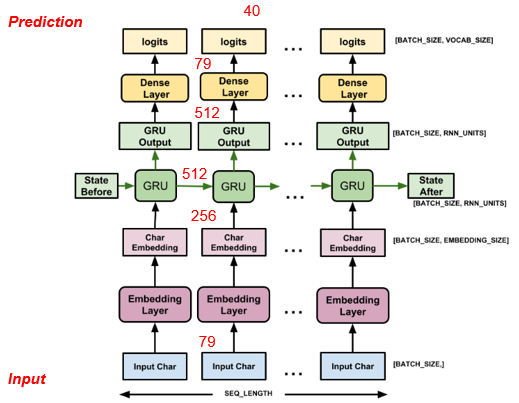

In [121]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 512

In [126]:
# RNN model with 4 layers 
#    1. Input Layer, shape=(batch_size), batch_size=batch_size
#    2. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim
#    3. RNN layer, rnn_units, 
#                        return_sequences=True, stateful=True,
#    4. Dense layer, vocab_size
#
#    stateful=True : the last state for each sample at index i in a batch 
#                    will be used as initial state for the sample of index i in the following batch
#                    input layer must be defined with a static batch size
#                    to use stateful=True

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential(
        [
            layers.Input(shape=(batch_size,), batch_size=batch_size),
            layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim),
            layers.SimpleRNN(rnn_units,
                            return_sequences=True,
                            stateful=True),
            layers.Dense(vocab_size)
        ]
    )

    return model

In [127]:
# Build the model. specify vocab_size, embedding_dim, rnn_units, batch_size
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=rnn_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (64, 64, 256)               │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ (64, 64, 512)               │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (64, 64, 75)                │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451,403 (1.72 MB)

 Trainable params: 451,403 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

### Check the dimensions of input, output, prediction

In [128]:
# Run the (not yet trained) model to see that it behaves as expected
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)

# Check the shape of the input, output, prediction
print("Input batch:     ", input_example_batch.shape)
print("Output batch:    ", target_example_batch.shape)
print("Batch prediction:", example_batch_predictions.shape)

Input batch:      (64, 40)
Output batch:     (64, 40)
Batch prediction: (64, 40, 75)


In [129]:
# Example generation. To get actual characters, we need to sample from the 79 prediction probability distribution
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices,axis=-1).numpy()

# Sampled next character indexes 
sampled_indices

array([24, 26, 16, 31, 61, 49, 52, 15, 49, 42, 34, 51, 15, 21, 60, 60, 58,
       42, 13, 69, 63,  3, 13, 22, 61, 63, 22, 13, 25,  3, 40, 23, 17, 35,
       74,  1,  2, 59, 37, 16], dtype=int64)

### Train the model

In [130]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = tf.keras.optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [131]:
# Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_rnns_ckpts/'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_rnns_{epoch}.weights.h5")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [132]:
# Train the model with dataset. 20 epochs. specify callbacks=[ckpt_callback]
EPOCHS=1
rnn_history = model.fit(dataset, epochs=EPOCHS, callbacks=[ckpt_callback])

426/426 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - loss: 2.4098


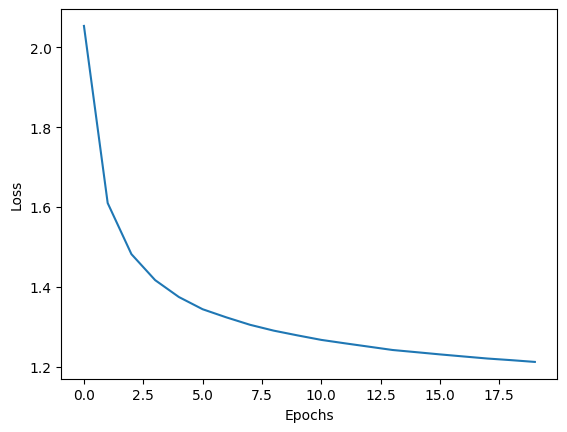

In [33]:
# Plot the loss
plt.plot(rnn_history.epoch, rnn_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [134]:
# To run the model with one sample(batch_size = 1),
# We rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, rnn_units, batch_size=1)

model.load_weights('./training_rnns_ckpts/ckpt_rnns_20.weights.h5')

In [135]:
# Check the model summary
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (1, 1, 256)                 │          19,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (1, 1, 512)                 │         393,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (1, 1, 75)                  │          38,475 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 451,403 (1.72 MB)

 Trainable params: 451,403 (1.72 MB)

 Non-trainable params: 0 (0.00 B)

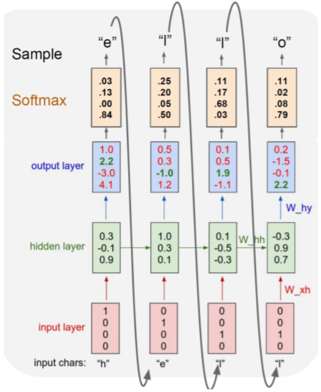

In [137]:
# The prediction loop
def generate_text(model, start_string, n_generate, display):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    # model.reset_states()
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.RNN):
            layer.reset_states()
            
    for i in range(n_generate):
        if(display): print("Input:", input_eval.numpy())
        
        predictions = model(input_eval)

        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        if(display): print("Prediction:", predicted_id)

        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [138]:
# Generate text from start string "It was "
# Test 10 generation with display of input/prediction 
print(generate_text(model, start_string="It was ", n_generate=10, display=1))

Input: [[32 68  1 71 49 67  1]]
Prediction: 62
Input: [[62]]
Prediction: 63
Input: [[63]]
Prediction: 71
Input: [[71]]
Prediction: 1
Input: [[1]]
Prediction: 67
Input: [[67]]
Prediction: 63
Input: [[63]]
Prediction: 57
Input: [[57]]
Prediction: 60
Input: [[60]]
Prediction: 1
Input: [[1]]
Prediction: 63
It was now soil o


In [139]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was", n_generate=1000, display=0))

It was
then every agreed that there was not half which flashes
of a solumes and the engineer could ready to more a man of there between the enormous
cause, and zen a tork, on their ard clay drawn hone of the island of circumstances which,
in the
convicts, and succeeded a buntstance was anf the
best
exced by Pother from whitenes, under of his vessel
from conemarward his companions refuge-die could began to take a  closed in return by Ayrton, at no longer plan, but there was ended the presen over intergial requiring pals question, or evident to say,   added, crossed the extremity of the male, which were rushing received mystir,   whir of the heart, and should
be and
Ayrton was Ayrton, which is not about it. A
  Doable rufter to be at succeeded, for the loplusing in the
last, bud our enlamosity of the beach that power the lakf the convuled
  Bonadventure more note of night, the villains the honor of the incident, momich favern, Herbert from time if the nettlers?  

  Point that
their cupr

In [140]:
# Generate 1000 character text from start string "It was ". set display=0
print(generate_text(model, start_string="It was", n_generate=1000, display=0))

It was
tell you of the privexpenould even three heard asked in this day to be feared; they
arrived ever rendered syeressed?   answered Cyrus Harding.   There was nothing, the center plates, which
was
other Lincoln
Island,   said Pencroft!   all this moment.

At now sometion of sig.

  Colbeen, nor rejoined uponient sublint of the valleys. He called umong fvosses of saved, asspecions
could sail is
produce on--aly arding crafles devastated through the incandish coursed some of the lower place.

Cyrus Harding and all divide the spot which wanting?

Ayrton, had perfectle
treen. The
fired first day.

During the volcane.

panions
be.
The ry island, was three yractly sown whom thoon cave of poluntable done unlast shelters, who is not watching friends, after a word,   all mears of Ayrton.   In the draught of this cretting many influence of skelland on the sea!
  he valley.

Pencroft framed in the cauling cut--  said Native
destruct replied by his fusted in any of the
vapor.

So frighthes,
  e 

---

# Quiz 1 : Image Classification Model on the CIFAR-10
- Build the Convolutional Neural Networks for CIFAR-10 image classification task
    - Build the model following the bellow model summary
    - Apply the dropout regularization to the model
- Compare the performance of the model built last week

### Import TensorFlow and other libraries

In [141]:
import tensorflow as tf
from tensorflow.keras import datasets, models, layers
import matplotlib.pyplot as plt

### Load the CIFAR-10 Dataset

In [142]:
# load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 615s 4us/step


In [144]:
# Check the shape of dataset
train_images.shape

(50000, 32, 32, 3)

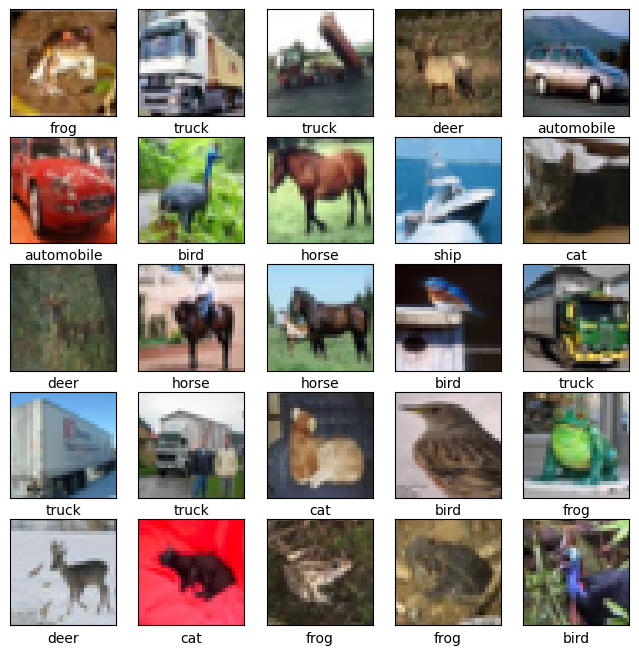

In [145]:
# Show the first 25 image data with labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Build the CNN model

In [161]:
# CNN model with 2 convolution layers
#  An input layer
#    1. shape=(32, 32, 3)
#  2 convolutional layers
#    2. 32 3x3 filters, padding = "same", input_shape = (32, 32, 3), activation="relu"
#       and Max pooling of size 2
#    3. 64 3x3 filters, activation="relu"
#       and Max pooling of size 2
#  and 2 dense layers 
#    4. 128, activation="relu"
#    5. 10, activation="softmax"

cifar_model = tf.keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [162]:
# Show the model summary
cifar_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 422,218 (1.61 MB)

 Trainable params: 422,218 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [163]:
# Compile the model(set optimizer, loss function, and metrics)
cifar_model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

### Train the model

In [164]:
# train the CNN model for 20 epochs
cifar_history = cifar_model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.3429 - loss: 1.7816 - val_accuracy: 0.5592 - val_loss: 1.2354
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5442 - loss: 1.2795 - val_accuracy: 0.6176 - val_loss: 1.0955
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5962 - loss: 1.1392 - val_accuracy: 0.6475 - val_loss: 0.9924
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6360 - loss: 1.0330 - val_accuracy: 0.6707 - val_loss: 0.9303
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.6575 - loss: 0.9656 - val_accuracy: 0.6869 - val_loss: 0.9085
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6791 - loss: 0.9082 - val_accuracy: 0.6847 - val_loss: 0.9202
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6960 - loss: 0.8561 - val_accuracy: 0.6936 - val_loss: 0.8817
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7097 -

### Plot the learning curves

(0.0, 19.0)

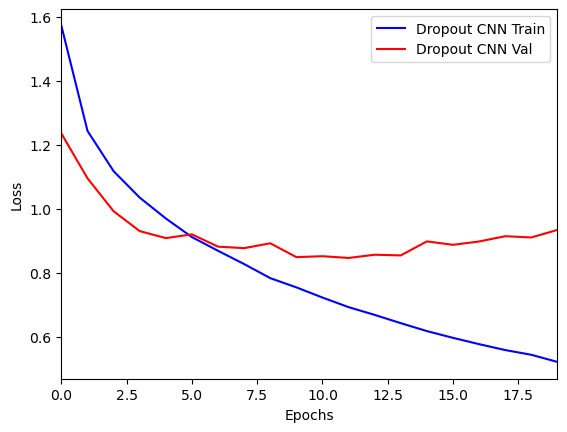

In [169]:
# plot the train/validation losses for each model
plt.plot(cifar_history.history['loss'], label='Dropout CNN Train', color='blue')
plt.plot(cifar_history.history['val_loss'], label='Dropout CNN Val', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim([0,max(cifar_history.epoch)])

In [171]:
# Train and test accuracy. use evaluate()
loss, acc = cifar_model.evaluate(train_images, train_labels)
print('Train accuracy : %.4f' % acc)
loss, acc = cifar_model.evaluate(test_images, test_labels)
print('Test accuracy : %.4f' % acc)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9120 - loss: 0.2772
Train accuracy : 0.9118
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7191 - loss: 0.9086
Test accuracy : 0.7177


---

# Quiz 2 : Character-level Language Model
- Generate texts like Shakespeare's sonnet
- Build the Character-level Language Model with LSTM
- Try various sequence lengths for training, and see their effects on the results

### Load and preprocess the Shakespeare dataset

In [4]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt',
'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')

# Load whole text file as a string, then decode.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# length of text is the number of characters in it
print ('Length of text:', len(text))

Length of text: 1115394


In [5]:
# Check first 500 characters
print(text[:500])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor


In [6]:
# The unique characters in the file
vocab = sorted(set(text))

print(vocab)
print ('Number of unique characters:', len(vocab))

['\n', ' ', '!', '$', '&', "'", ',', '-', '.', '3', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
Number of unique characters: 65


### Encode the text into integers

In [7]:
char2idx = {ch:i for i, ch in enumerate(vocab)}
idx2char = np.array(vocab)

# Encode the text to integers
encoded_text = np.array([char2idx[c] for c in text])

### Create TensorFlow Dataset

In [8]:
# Create dataset from encoded text
ds = tf.data.Dataset.from_tensor_slices(encoded_text)

### Make character sequences from the dataset

In [9]:
# The maximum length sentence we want for a single input in characters
seq_length = 40

# Convert encoded text dataset into sequence of input characters. 'batch' method is used
ds = tf.data.Dataset.from_tensor_slices(encoded_text)
ds_sequences = ds.batch(seq_length+1, drop_remainder=True)

### Create the training sequences (input, target)

In [10]:
# map_func
def split_input_target(sequence):
    
    # input text is shifted to form the target text 
    input_text = sequence[:-1]
    target_text = sequence[1:]
    
    return input_text, target_text

# Make sequences of (input, target). 'map' method is used
ds_pair_sequences = ds_sequences.map(split_input_target)

### Create training batches
- **dataset** : batched training dataset. shape = (*, 2, 64, 40)

In [11]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
BUFFER_SIZE = 1000

# Make batches of data with shuffle for training
dataset = ds_pair_sequences.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [12]:
# Check the shape of dataset
np.array(list(dataset.as_numpy_iterator())).shape

(425, 2, 64, 40)

### Build the model
- 3 layers are used to define this model: Embedding, LSTM, and Dense

In [13]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 128

# Number of LSTM units
lstm_units = 256

In [14]:
# LSTM model with 3 layers 
#    1. Input Layer, shape=(batch_size), batch_size=batch_size
#    2. Embedding layer, input_dim=vocab_size, output_dim=embedding_dim
#    3. LSTM layer, rnn_units, 
#                   return_sequences=True, stateful=True,
#    4. Dense layer, vocab_size

def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.Sequential(
        [
            layers.Input(shape=(batch_size,), batch_size=batch_size),
            layers.Embedding(input_dim=vocab_size,
                            output_dim=embedding_dim),
            layers.LSTM(rnn_units,return_sequences=True,stateful=True),
            layers.Dense(vocab_size)
        ]
    )
    
    
    return model

In [15]:
# Build the model 
model = build_model(
    vocab_size = vocab_size,
    embedding_dim=embedding_dim,
    rnn_units=lstm_units,
    batch_size=BATCH_SIZE)

# Check the model architecture
# Model can be run on inputs of any length 
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (64, 64, 128)               │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (64, 64, 256)               │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (64, 64, 65)                │          16,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419,265 (1.60 MB)

 Trainable params: 419,265 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [16]:
# Use the standard tf.keras.losses.sparse_categorical_crossentropy loss. set from_logits=True  
loss =  tf.losses.SparseCategoricalCrossentropy(from_logits=True)

# Use tf.keras.optimizers.Adam optimizer with clipnorm=5.0
optimizer = tf.keras.optimizers.Adam(clipnorm=5.0)

# Compile the model - configure the training procedure 
model.compile(optimizer=optimizer, loss=loss)

In [18]:
# 2. Configure the checkpoints
# Use tf.keras.callbacks.ModelCheckpoint to save the model checkpoint

# Directory where the model weights will be saved
ckpt_dir = './training_lstm_ckpts'

# Checkpoint name
ckpt_prefix = os.path.join(ckpt_dir, "ckpt_lstm_{epoch}.weights.h5")

# Callback function to save the model weights
ckpt_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=ckpt_prefix,
    save_weights_only=True)

In [19]:
# Train the model with dataset. 20 epochs
EPOCHS=20
lstm_history = model.fit(dataset, epochs=EPOCHS, callbacks=[ckpt_callback])

Epoch 1/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 47s 103ms/step - loss: 2.7742
Epoch 2/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - loss: 1.9735
Epoch 3/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - loss: 1.8062
Epoch 4/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 45s 105ms/step - loss: 1.7114
Epoch 5/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - loss: 1.6461
Epoch 6/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 44s 102ms/step - loss: 1.6008
Epoch 7/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - loss: 1.5675
Epoch 8/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - loss: 1.5417
Epoch 9/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - loss: 1.5222
Epoch 10/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 42s 99ms/step - loss: 1.5030
Epoch 11/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - loss: 1.4884
Epoch 12/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 101ms/step - loss: 1.4743
Epoch 13/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 100ms/step - loss: 1.4641
Epoch 14/20
425/425 ━━━━━━━━━━━━━━━━━━━━ 43s 102ms/step - loss: 1.4551
Epoch 15/20
425/4

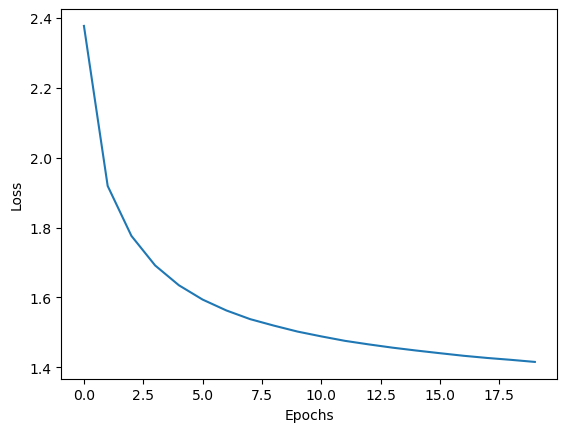

In [20]:
# plot the loss
plt.plot(lstm_history.epoch, lstm_history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

### Generate text

In [23]:
# Rebuild the model with batch_size=1, and load the weights from the saved checkpoint. 
model = build_model(vocab_size, embedding_dim, lstm_units, batch_size=1)

model.load_weights('./training_lstm_ckpts/ckpt_lstm_20.weights.h5')

In [24]:
# Check the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (1, 1, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (1, 1, 256)                 │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 1, 65)                  │          16,705 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 419,265 (1.60 MB)

 Trainable params: 419,265 (1.60 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# The prediction loop
def generate_text(model, start_string, n_generate):

    # Converting start_strings to index (vectorizing)
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    
    # Making the empty list to store results
    text_generated = []

    # Here batch size == 1
    for layer in model.layers:
        if isinstance(layer, tf.keras.layers.RNN):
            layer.reset_states()
            
    for i in range(n_generate):      
        predictions = model(input_eval) ##
        
        # remove the batch dimension
        predictions = tf.squeeze(predictions, 0)

        # using a categorical distribution to predict the character
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1,0].numpy()
        if(display): print("Prediction:", predicted_id)
            
        # Passing the predicted character as the next input to the model along with the previous hidden state
        input_eval = tf.expand_dims([predicted_id], 0)

        text_generated.append(idx2char[predicted_id])

    return (start_string + ''.join(text_generated))

In [27]:
# Generate 1000 character text from start string "All: "
print(generate_text(model, start_string="All: ", n_generate=1000))

Prediction: 54
Prediction: 59
Prediction: 47
Prediction: 57
Prediction: 53
Prediction: 52
Prediction: 47
Prediction: 52
Prediction: 45
Prediction: 8
Prediction: 1
Prediction: 21
Prediction: 1
Prediction: 51
Prediction: 39
Prediction: 49
Prediction: 43
Prediction: 1
Prediction: 44
Prediction: 53
Prediction: 56
Prediction: 58
Prediction: 59
Prediction: 52
Prediction: 43
Prediction: 5
Prediction: 57
Prediction: 1
Prediction: 40
Prediction: 59
Prediction: 57
Prediction: 47
Prediction: 42
Prediction: 43
Prediction: 12
Prediction: 0
Prediction: 14
Prediction: 43
Prediction: 41
Prediction: 39
Prediction: 59
Prediction: 57
Prediction: 43
Prediction: 1
Prediction: 61
Prediction: 47
Prediction: 50
Prediction: 50
Prediction: 6
Prediction: 1
Prediction: 21
Prediction: 1
Prediction: 61
Prediction: 47
Prediction: 50
Prediction: 50
Prediction: 1
Prediction: 44
Prediction: 47
Prediction: 50
Prediction: 50
Prediction: 47
Prediction: 52
Prediction: 45
Prediction: 1
Prediction: 51
Prediction: 43
Predicti

Prediction: 39
Prediction: 58
Prediction: 1
Prediction: 63
Prediction: 53
Prediction: 59
Prediction: 6
Prediction: 1
Prediction: 28
Prediction: 43
Prediction: 58
Prediction: 56
Prediction: 59
Prediction: 41
Prediction: 46
Prediction: 47
Prediction: 53
Prediction: 6
Prediction: 1
Prediction: 61
Prediction: 43
Prediction: 1
Prediction: 61
Prediction: 47
Prediction: 58
Prediction: 46
Prediction: 1
Prediction: 39
Prediction: 1
Prediction: 50
Prediction: 47
Prediction: 44
Prediction: 43
Prediction: 0
Prediction: 32
Prediction: 53
Prediction: 1
Prediction: 41
Prediction: 56
Prediction: 63
Prediction: 1
Prediction: 53
Prediction: 58
Prediction: 46
Prediction: 43
Prediction: 56
Prediction: 1
Prediction: 39
Prediction: 52
Prediction: 41
Prediction: 50
Prediction: 43
Prediction: 47
Prediction: 57
Prediction: 5
Prediction: 42
Prediction: 1
Prediction: 57
Prediction: 58
Prediction: 56
Prediction: 39
Prediction: 61
Prediction: 47
Prediction: 58
Prediction: 46
Prediction: 1
Prediction: 39
Prediction